In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
train_data = pd.read_csv('train.csv')

In [3]:
X = train_data.iloc[:, 1:].values / 255
y = train_data.iloc[:, 0].values

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=.15)

In [4]:
Xtrain.shape, ytrain.shape, Xtest.shape, ytest.shape

((35700, 784), (35700,), (6300, 784), (6300,))

In [13]:
## train
torch_Xtrain = torch.from_numpy(Xtrain).type(torch.FloatTensor)
# torch_Xtrain = torch_Xtrain.view(-1, 1, 28, 28) # creating 28 by 28 images
torch_ytrain = torch.from_numpy(ytrain).type(torch.LongTensor)
# test
torch_Xtest = torch.from_numpy(Xtest).type(torch.FloatTensor)
# torch_Xtest = torch_Xtest.view(-1, 1, 28, 28)
torch_ytest = torch.from_numpy(ytest).type(torch.LongTensor)

# datasets
train_set = torch.utils.data.TensorDataset(torch_Xtrain, torch_ytrain)
test_set = torch.utils.data.TensorDataset(torch_Xtest, torch_ytest)

# dataloaders
train_loader = torch.utils.data.DataLoader(train_set, batch_size=32, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=32, shuffle=False)

In [6]:
images, labels = next(iter(train_loader))

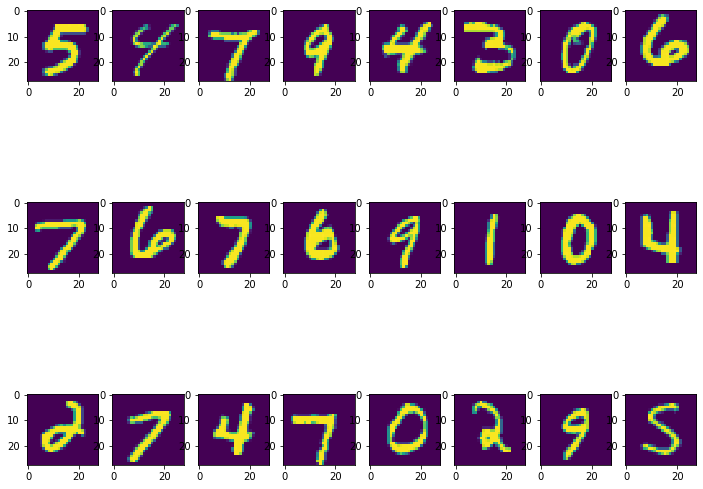

In [8]:
fig = plt.figure(figsize=(12, 10))
x, y = 8 ,3
for i in range(24):
    plt.subplot(y, x, i+1)
    plt.imshow(images[i].reshape(28, 28))
plt.show()

In [9]:
"""class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.conv1 = nn.Sequential(
            nn.Conv2d(1, 32, 3),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        
        self.conv2 = nn.Sequential(
            nn.Conv2d(32, 64, 3),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        
        self.fc1 = nn.Linear(64*7*7, 256)
        self.fc2 = nn.Linear(256, 10)
        
        self.dropout = nn.Dropout(p=.5)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.dropout(x)
        x = self.conv2(x)
        x = self.dropout(x)
        # flattening
        x = x.view(-1,64*7*7)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.log_softmax(self.fc2(x), dim=1)
        
        return x"""
    
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        
        self.fc1 = nn.Linear(784, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)
        
        self.dropout = nn.Dropout(p=.5)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = F.log_softmax(self.fc3(x), dim=1)
        
        return x

In [10]:
model = MLP()
model

MLP(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

In [11]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.NLLLoss()

In [ ]:
epochs = 10
model.train()
for epoch in range(epochs):
    running_loss = 0
    accuracy = 0
    for step, (x_b, y_b) in enumerate(train_loader):
        X_batch = Variable(x_b)
        Y_batch = Variable(y_b)
        
        optimizer.zero_grad()
        output = model(X_batch)
        loss = criterion(output, Y_batch)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        if step % 50 == 0:
            model.eval()
            pred = torch.max(output, 1)[1]
            accuracy += (pred == Y_batch).sum()
            print(f"Epoch: {epoch}, Train Loss: {running_loss}, Test Accuracy: {float(accuracy*100)/ float(32*(step+1))}")
            
        running_loss = 0

Epoch: 0, Train Loss: 2.0756030082702637, Test Accuracy: 25.0
Epoch: 0, Train Loss: 0.3402189016342163, Test Accuracy: 2.2058823529411766
Epoch: 0, Train Loss: 0.18092001974582672, Test Accuracy: 2.073019801980198
Epoch: 0, Train Loss: 0.23652683198451996, Test Accuracy: 2.0074503311258276
Epoch: 0, Train Loss: 0.12408842146396637, Test Accuracy: 1.9900497512437811
Epoch: 0, Train Loss: 0.5537452101707458, Test Accuracy: 1.9422310756972112
Epoch: 0, Train Loss: 0.19407545030117035, Test Accuracy: 1.931063122923588
Epoch: 0, Train Loss: 0.29413002729415894, Test Accuracy: 1.9052706552706553
Epoch: 0, Train Loss: 0.058569882065057755, Test Accuracy: 1.917082294264339
Epoch: 0, Train Loss: 0.407103955745697, Test Accuracy: 1.9054878048780488
Epoch: 0, Train Loss: 0.10939312726259232, Test Accuracy: 1.908682634730539
Epoch: 0, Train Loss: 0.51055908203125, Test Accuracy: 1.9056261343012704
Epoch: 0, Train Loss: 0.32012030482292175, Test Accuracy: 1.9030782029950084
Epoch: 0, Train Loss: 0.

In [ ]:
model.eval()
for images, labels in test_loader:
    #print(test_imgs.shape)
    images = Variable(images).float()
    output = model(images)
    predicted = torch.max(output,1)[1]
    accuracy += (predicted == labels).sum()
print("Test accuracy:{:.3f}% ".format(float(accuracy) / (len(test_loader)*32)))

# TESTING ON THE DATASET 

In [ ]:
test_data = pd.read_csv('test.csv')
test_data.head()

In [ ]:
test_data = test_data.iloc[:, :].values / 255
test_data_torch = torch.from_numpy(test_data).type(torch.FloatTensor)

In [ ]:
test_data_torch.shape

In [ ]:
plt.imshow(test_data_torch[0].view(28,28))

In [ ]:
model.eval()
test_Images = Variable(test_data_torch).float()
output = model(test_Images)
y_pred = torch.max(output, 1)[1]

In [ ]:
# checking all values are being predicted
y_pred.unique()

In [ ]:
y_pred

In [ ]:
# saving the model
torch.save(model.state_dict(), 'pytorch_model.pt')

In [ ]:
# creating the submission file
submission = pd.DataFrame({"ImageId":[i+1 for i in range(len(test_data_torch))],
                           "Label": y_pred})
submission.head()

In [ ]:
submission.to_csv("submission_with_pytorch.csv", index=False, header=True)